# Visualización con Seaborn y Matplotlib
### Merging en pandas

In [7]:
import pandas as pd 
import numpy as np
#!pip install seaborn
import seaborn as sns


In [8]:
df = pd.read_csv(r'C:\Users\javier\Documents\curso_intro_python_poly\clases\loan_data_set.csv')

In [9]:
df.fillna( method= 'bfill'  ,inplace=True)

C:\Users\javier\AppData\Local\Temp\ipykernel_43976\930908277.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna( method= 'bfill'  ,inplace=True)


In [10]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
date                 0
dtype: int64

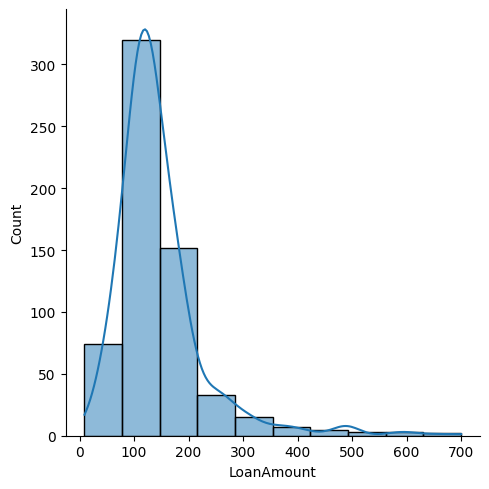

In [36]:
#sns.displot(df['LoanAmount'],bins=10)
sns.displot(data=df,x='LoanAmount',bins=10, kde=True)

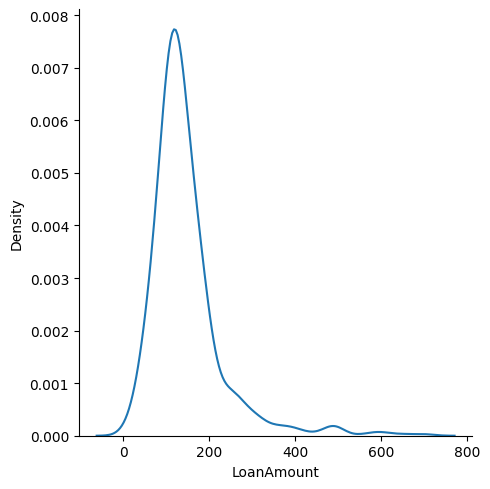

In [17]:
sns.displot(data=df,x='LoanAmount', kind="kde") #“hist”, “kde”, “ecdf

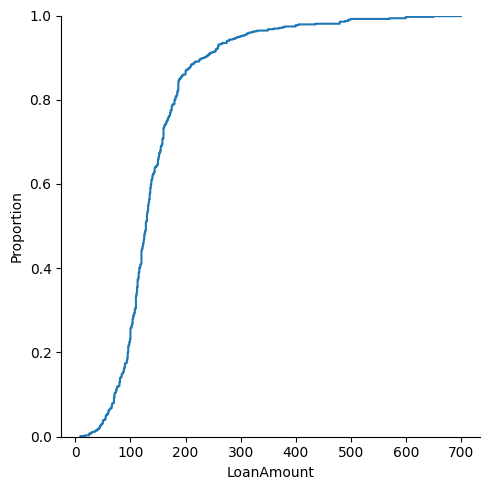

In [19]:
#empirical cumulative distribution functions (ECDFs)
sns.displot(data=df,x='LoanAmount', kind="ecdf")

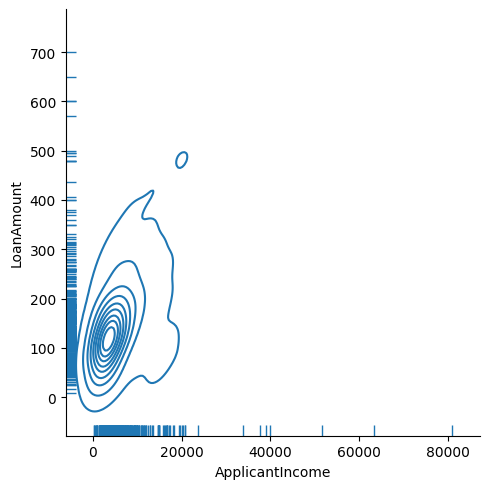

In [23]:
sns.displot(data=df, x="ApplicantIncome", y="LoanAmount", kind="kde" , rug=True)#, kind="kde" ; , rug=True(marginal)

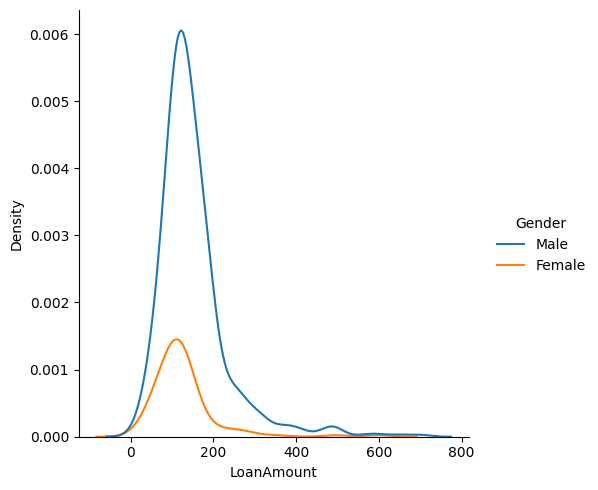

In [26]:
sns.displot(data=df,x='LoanAmount', hue='Gender', kind="kde")#, multiple="stack"

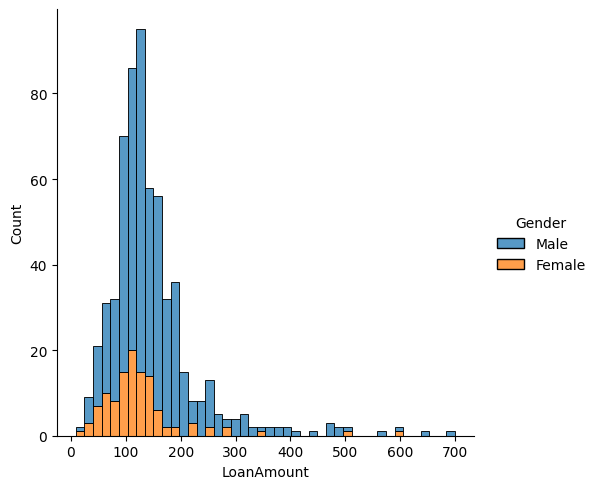

In [27]:
sns.displot(data=df,x='LoanAmount', hue='Gender',multiple="stack") 

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

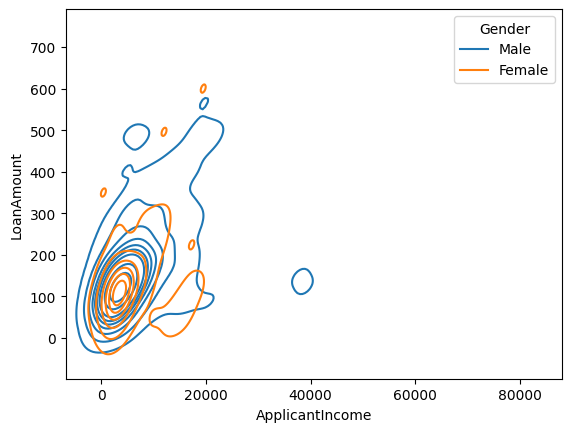

In [97]:
sns.kdeplot(data=df,x='ApplicantIncome',y='LoanAmount', hue="Gender")

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

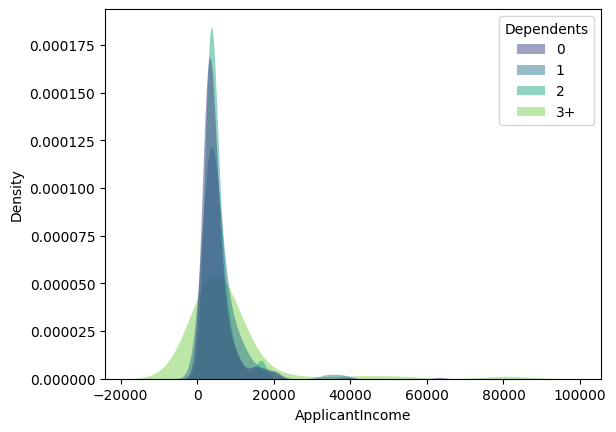

In [105]:
#sns.kdeplot(data=df,x='ApplicantIncome', multiple="stack",hue='Dependents')
#https://seaborn.pydata.org/tutorial/color_palettes.html
sns.kdeplot(data=df,x='ApplicantIncome',hue='Dependents',fill=True, common_norm=False, palette="viridis",
   alpha=.5, linewidth=0)

<Axes: xlabel='LoanAmount', ylabel='Density'>

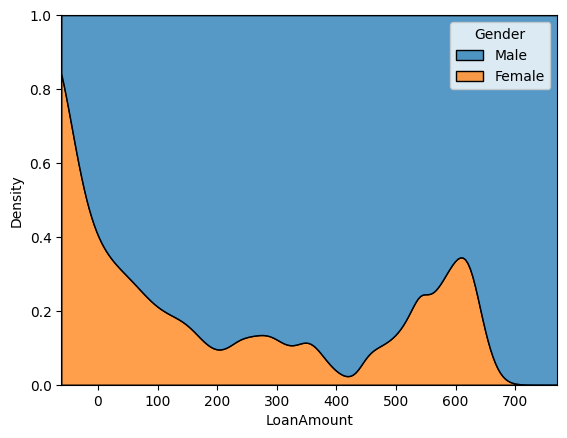

In [100]:
sns.kdeplot(data=df, x="LoanAmount", hue="Gender", multiple="fill")

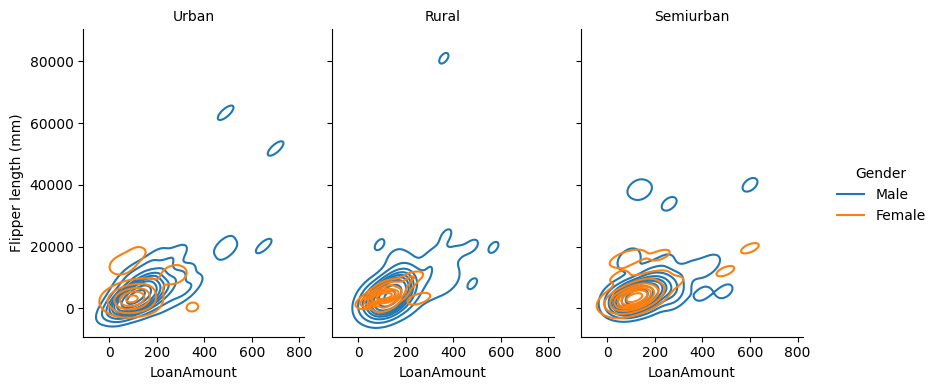

In [43]:
g= sns.displot(data=df,x='LoanAmount',y='ApplicantIncome', hue='Gender',col='Property_Area',kind='kde',
            height=4, aspect=.7,) 
g.set_axis_labels("LoanAmount", "Flipper length (mm)")
g.set_titles("{col_name}")

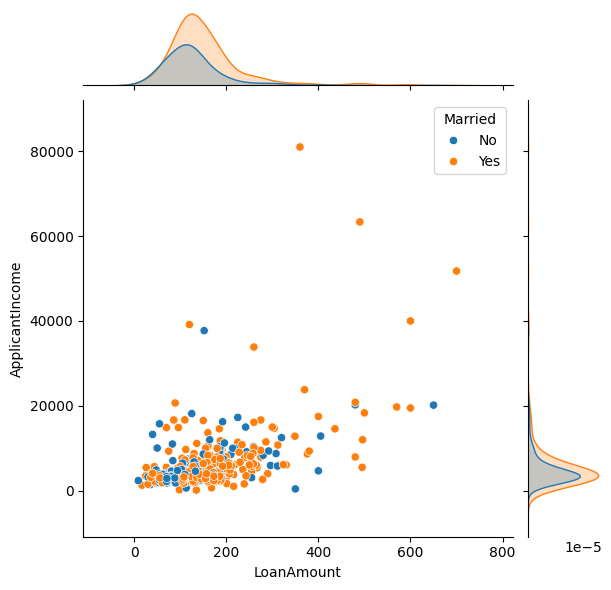

In [50]:
sns.jointplot(data=df, x='LoanAmount',y='ApplicantIncome', hue="Married")#, kind="kde",

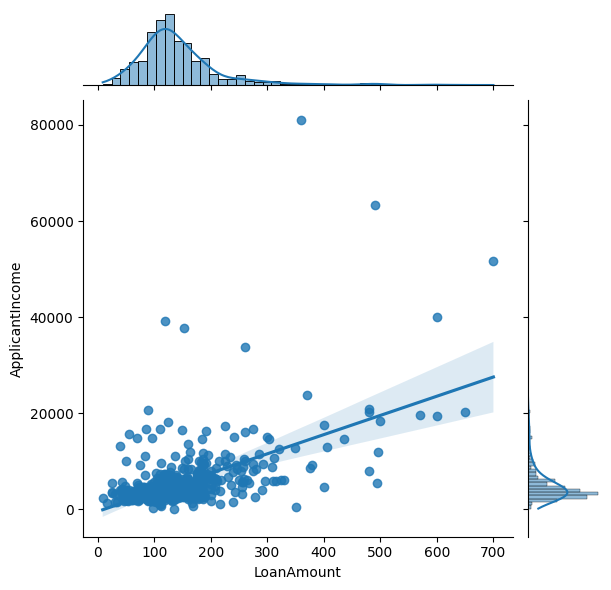

In [264]:
sns.jointplot(data=df, x='LoanAmount',y='ApplicantIncome',  kind="reg")

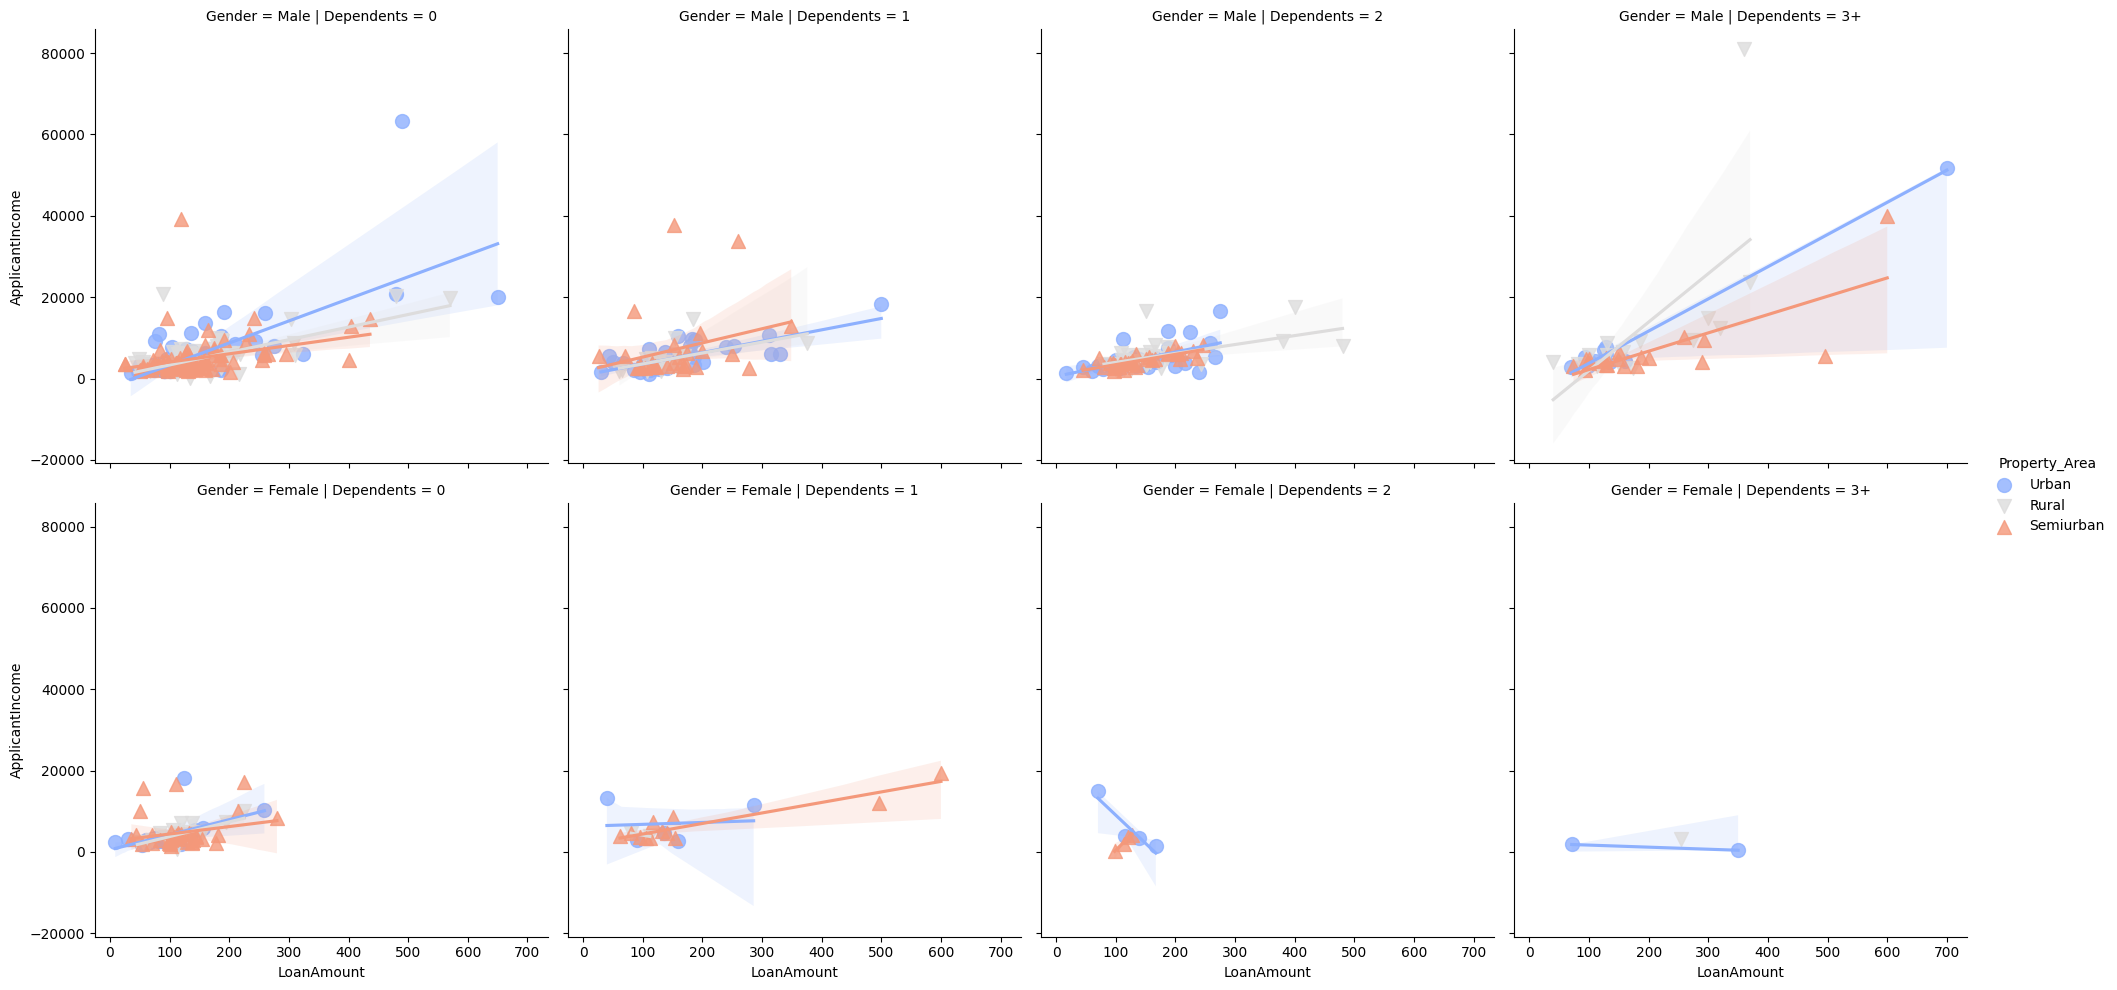

In [268]:
sns.lmplot(data=df, x='LoanAmount',y='ApplicantIncome',hue='Property_Area',palette='coolwarm',
           markers=['o','v','^'],scatter_kws={'s':100}, row="Gender", col="Dependents")

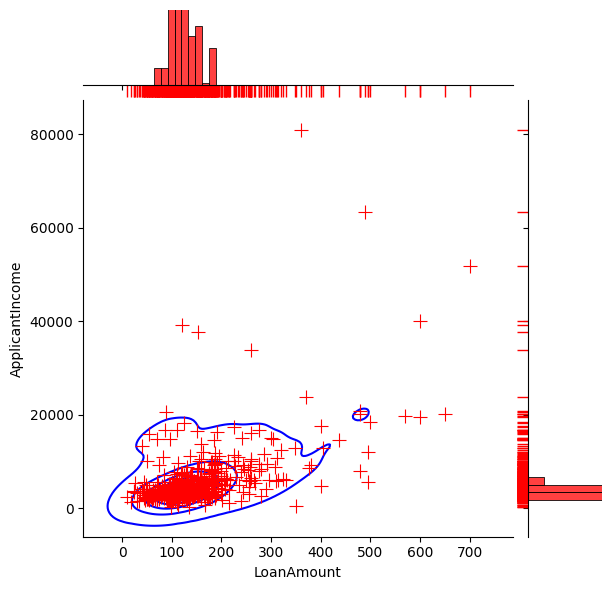

In [61]:
g =sns.jointplot(
    data=df, x='LoanAmount',y='ApplicantIncome', color="r",
    marker="+", s=100, marginal_kws=dict(bins=50, fill=True),
)
g.plot_joint(sns.kdeplot, color="b", zorder=0, levels=6)
g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

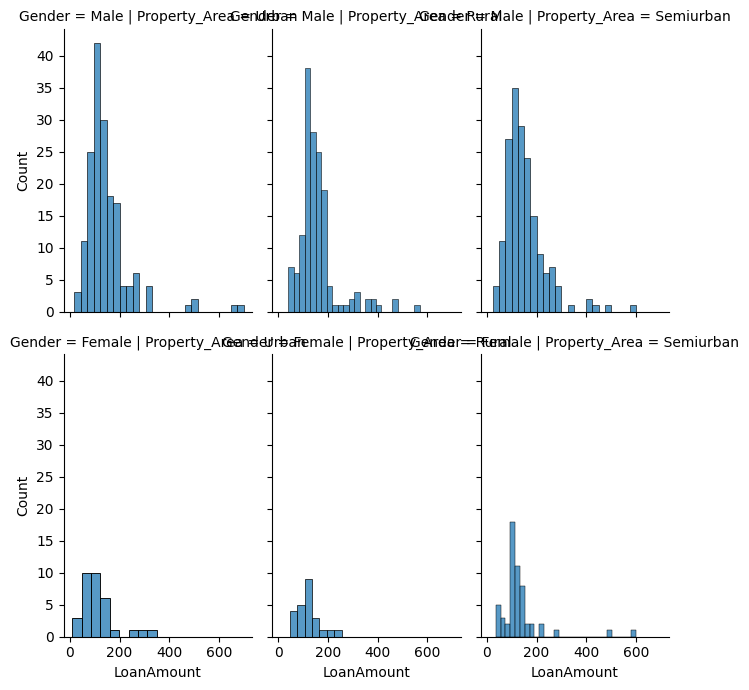

In [206]:
g=sns.FacetGrid(df, col="Property_Area", row="Gender", height=3.5, aspect=.65)
g.map(sns.histplot,"LoanAmount")

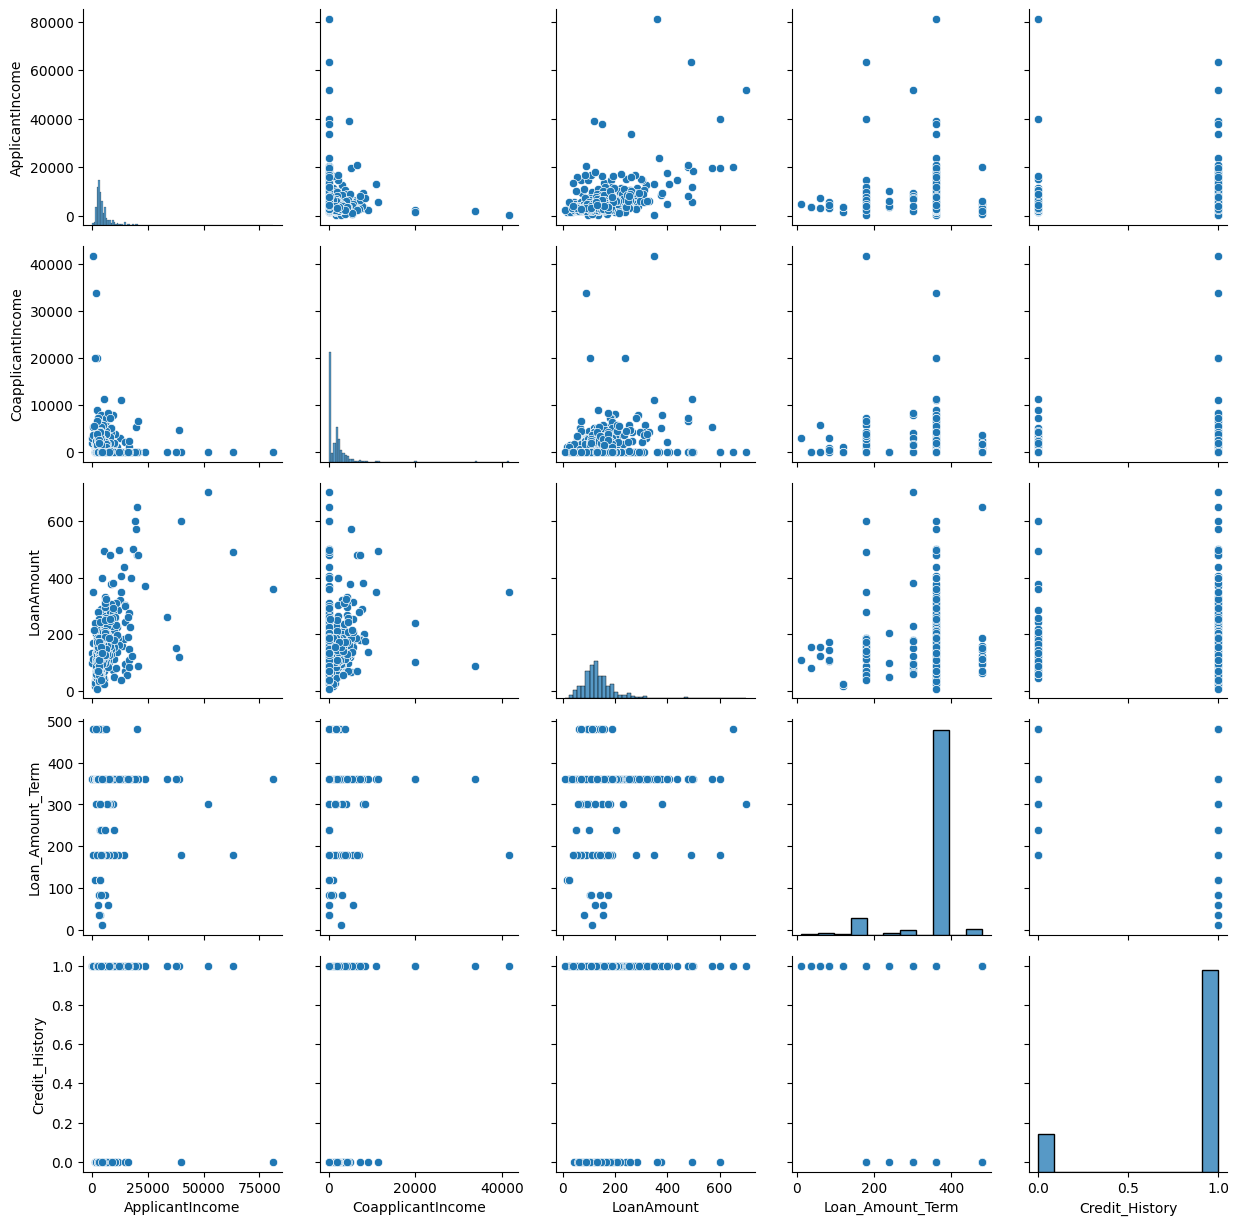

In [65]:
g=sns.PairGrid(df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

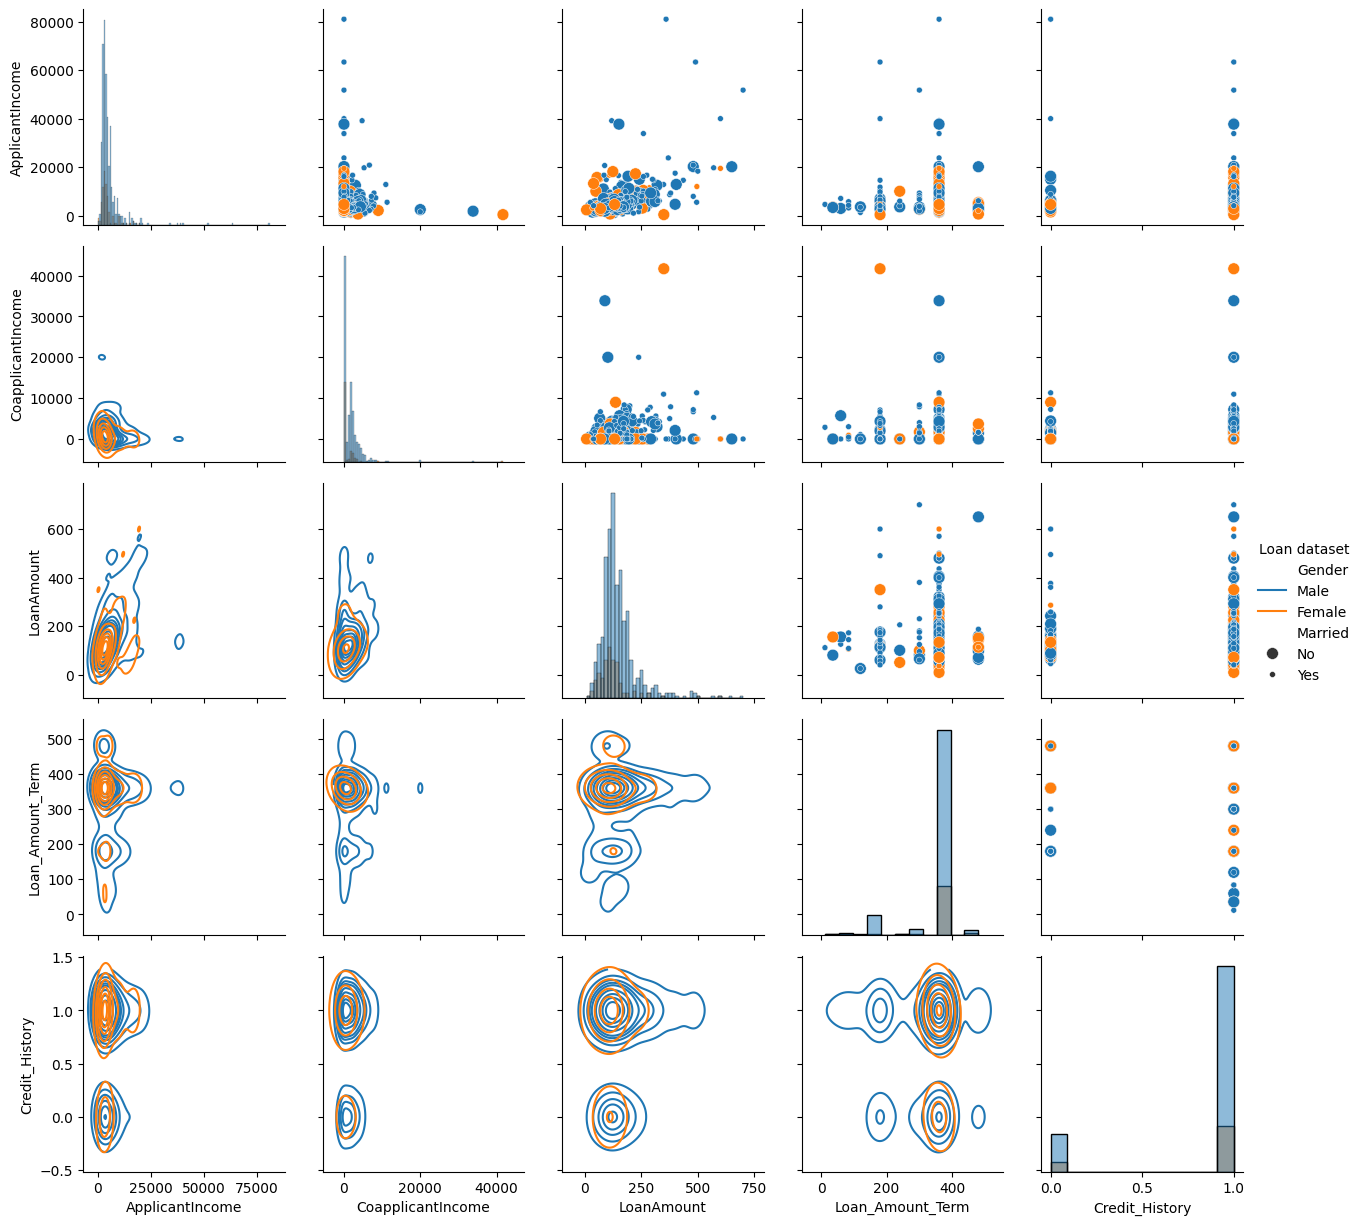

In [73]:
g = sns.PairGrid(df, diag_sharey=False, corner=False, hue="Gender")
g.map_upper(sns.scatterplot, size=df["Married"])
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)
g.add_legend(title="Loan dataset", adjust_subtitles=True) #para hue

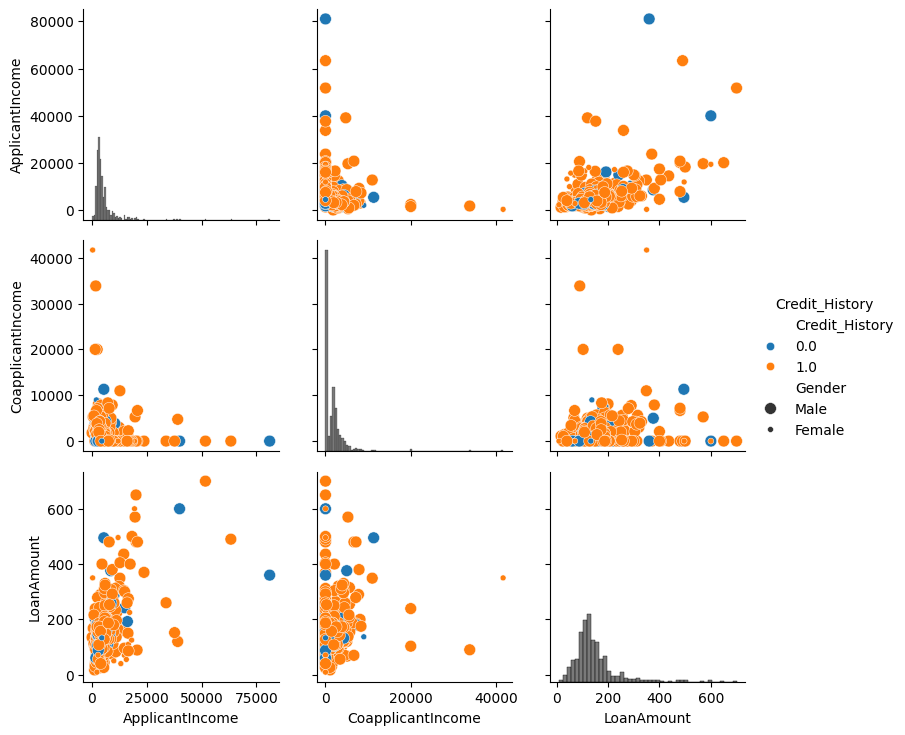

In [77]:
variables = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]
g = sns.PairGrid(df, hue="Credit_History", vars=variables)
g.map_diag(sns.histplot, hue=None, color=".3")
g.map_offdiag(sns.scatterplot, size=df["Gender"])
g.add_legend()

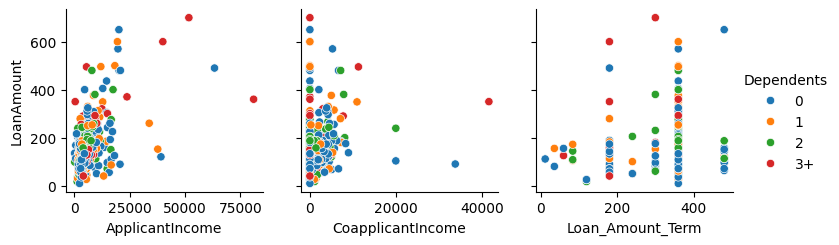

In [79]:
x_vars = ["ApplicantIncome", "CoapplicantIncome", "Loan_Amount_Term"]
y_vars = ["LoanAmount"]
g = sns.PairGrid(df, hue="Dependents", x_vars=x_vars, y_vars=y_vars)
g.map_diag(sns.histplot, color=".3")
g.map_offdiag(sns.scatterplot)
g.add_legend()

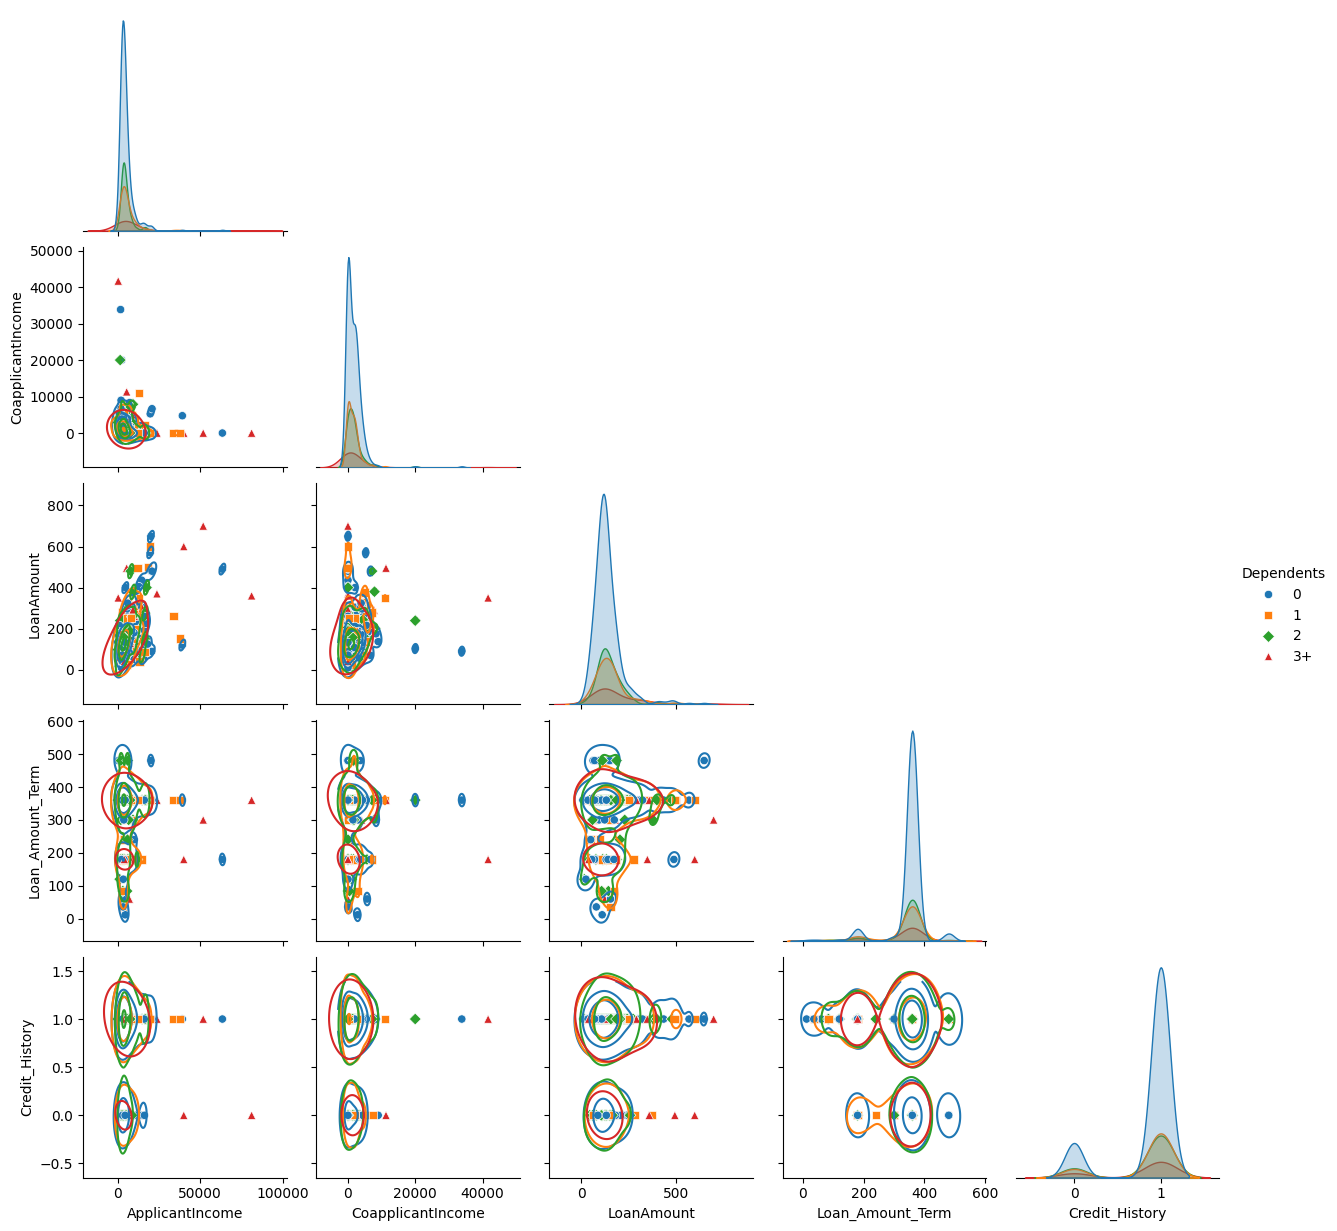

In [86]:
g=sns.pairplot(df, hue="Dependents", markers=["o", "s", "D","^"], corner=True)
g.map_lower(sns.kdeplot, levels=4, color=".2")

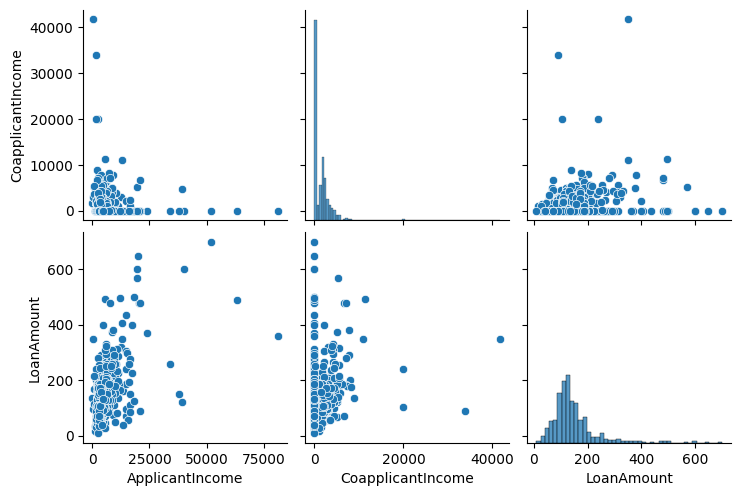

In [204]:
sns.pairplot(
    df,
    x_vars=["ApplicantIncome", "CoapplicantIncome", "LoanAmount"],
    y_vars=["CoapplicantIncome", "LoanAmount"],
)

## barras de errores

In [114]:
import matplotlib.pyplot as plt 

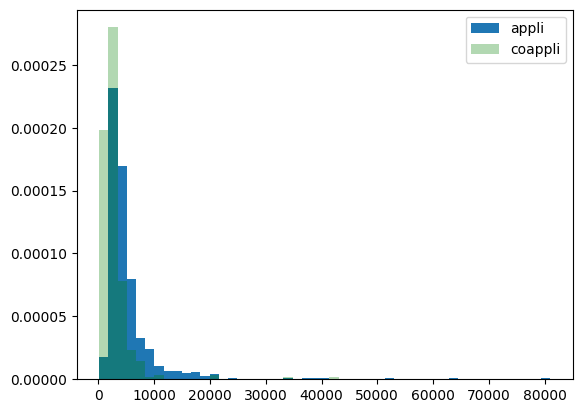

In [135]:
#plt.plot(df['ApplicantIncome'],df['LoanAmount'])
#plt.scatter(df['ApplicantIncome'],df['LoanAmount'])
min=df['ApplicantIncome'].min()
max=df['ApplicantIncome'].max()
bins = np.linspace(min,max,50)
hist,bin_,_= plt.hist(df['ApplicantIncome'],bins=bins,density=True,label='appli')
_,_,_= plt.hist(df['CoapplicantIncome'],bins=bin_,density=True,label='coappli',alpha=0.3,color='green')
plt.legend()

Text(0.5, 0, 'Loan_Amount_Term')

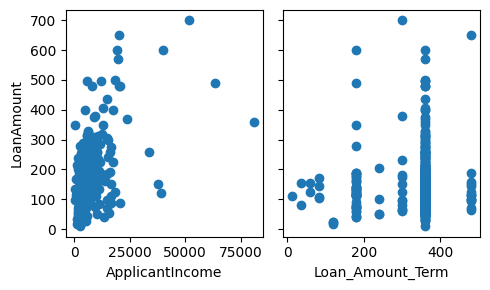

In [157]:
f, axs = plt.subplots(1,2, figsize=(5, 3), sharey=True, layout="tight")
axs[0].scatter(df['ApplicantIncome'],df['LoanAmount'])
axs[0].set_xlabel('ApplicantIncome')
axs[0].set_ylabel('LoanAmount')
axs[1].scatter(df['Loan_Amount_Term'],df['LoanAmount'])
axs[1].set_xlabel('Loan_Amount_Term')


- Barras de error del intervalo de confianza

- El enfoque no paramétrico para representar la incertidumbre utiliza el método bootstrap: un procedimiento en el que el conjunto de datos se vuelve a muestrear aleatoriamente con reemplazo varias veces y la estimación se vuelve a calcular a partir de cada nueva muestra. Este procedimiento crea una distribución de estadísticas que se aproxima a la distribución de valores que podría haber obtenido para su estimación si hubiera tenido una muestra diferente.

- El intervalo de confianza se construye tomando un intervalo de percentil de la distribución bootstrap. De forma predeterminada, errorbar="ci" dibuja un intervalo de confianza del 95 %. ("se", 2) implica 'se' a dos sigma


<Axes: xlabel='LoanAmount'>

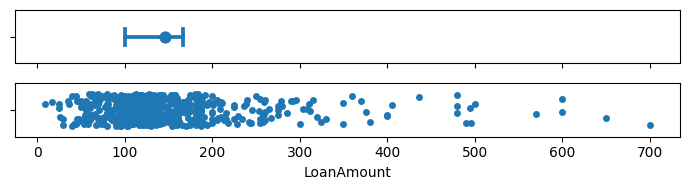

In [161]:
#se=standard deviation divided by the square root of the sample size
f, axs = plt.subplots(2, figsize=(7, 2), sharex=True, layout="tight")
sns.pointplot(x=df['LoanAmount'], errorbar=("pi", 50), capsize=.3, ax=axs[0])#errorbar=ci, pi, se, sd
sns.stripplot(x=df['LoanAmount'], jitter=.3, ax=axs[1])

<Axes: xlabel='LoanAmount'>

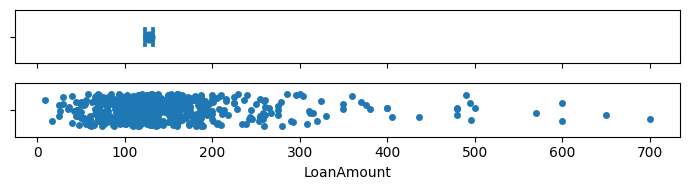

In [164]:
f, axs = plt.subplots(2, figsize=(7, 2), sharex=True, layout="tight")
sns.pointplot(x=df['LoanAmount'], errorbar="ci", estimator='median', n_boot=5000, seed=10, capsize=.3, ax=axs[0])#errorbar=ci, pi, se, sd
sns.stripplot(x=df['LoanAmount'], jitter=.3, ax=axs[1])

<Axes: xlabel='LoanAmount'>

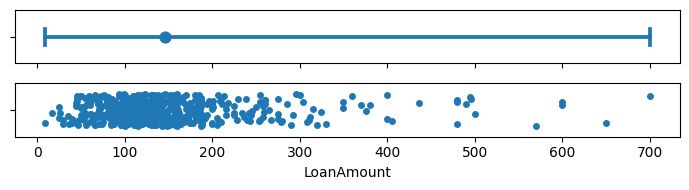

In [166]:
min= df['LoanAmount'].min()
max= df['LoanAmount'].max()
f, axs = plt.subplots(2, figsize=(7, 2), sharex=True, layout="tight")
sns.pointplot(x=df['LoanAmount'],errorbar=lambda x: (min,max), capsize=.3, ax=axs[0])#errorbar=ci, pi, se, sd
sns.stripplot(x=df['LoanAmount'], jitter=.3, ax=axs[1])

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

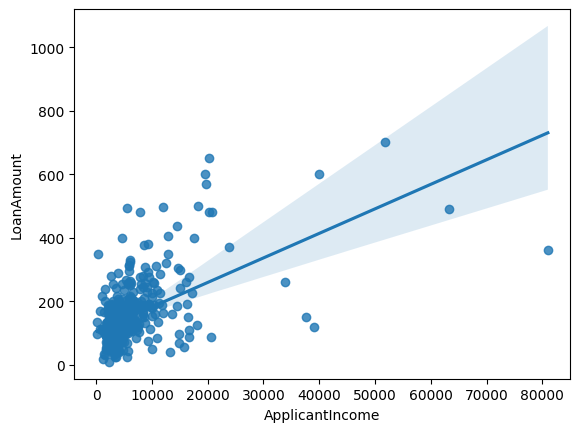

In [167]:
sns.regplot(x=df['ApplicantIncome'], y=df['LoanAmount'])

# Plots para datos categoricos

- barplot: Es un gráfico general que le permite agregar los datos categóricos basados en alguna función, el valor predeterminado es la media:
- countplot: Esto es esencialmente lo mismo que Barplot, excepto que el estimador está contando explícitamente el número de ocurrencias
- boxplot: los boxplots y violin plots se utilizan para mostrar la distribución de datos categóricos. El cuadro muestra los cuartiles del conjunto de datos, mientras que los bigotes se extienden para mostrar el resto de la distribución, a excepción de los puntos que se determinan como “valores atípicos” utilizando un método que es una función del rango intercuartílico.
- Un plot de violín juega un papel similar a un box, pero esta presenta una estimación de la densidad del núcleo de la distribución subyacente
- El stripplot dibujará un diagrama de dispersión donde una variable es categórica. 
-El swarmplot es similar a stripplot(), pero los puntos se ajustan (solo a lo largo del eje categórico) para que no se superpongan.

<Axes: xlabel='Dependents', ylabel='LoanAmount'>

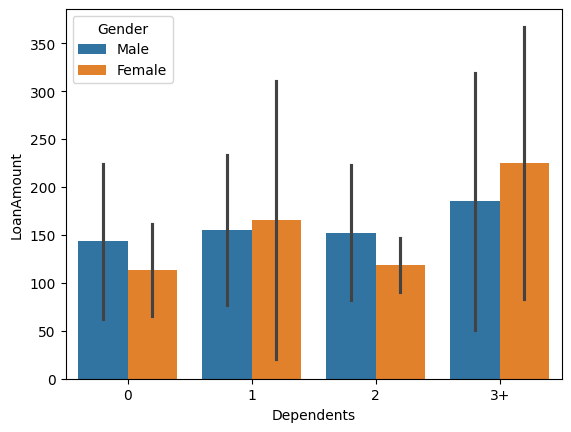

In [112]:
sns.barplot(df, x="Dependents", y="LoanAmount", hue="Gender",errorbar="sd")# “ci”, “pi”(percentil inter), “se”(standar error), or “sd”(std)

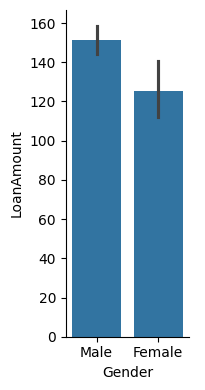

In [193]:
sns.catplot(
    df,kind='bar',
    x="Gender", y="LoanAmount", 
    height=4, aspect=.5,
)


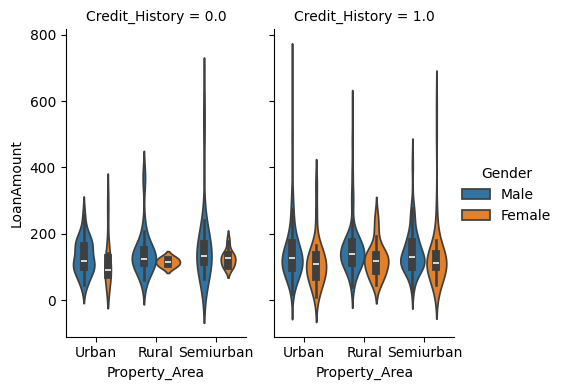

In [190]:
sns.catplot(
    df, kind="violin", #box"boxen"violin
    x="Property_Area", y="LoanAmount", col="Credit_History", hue="Gender", 
    height=4, aspect=.6,
)


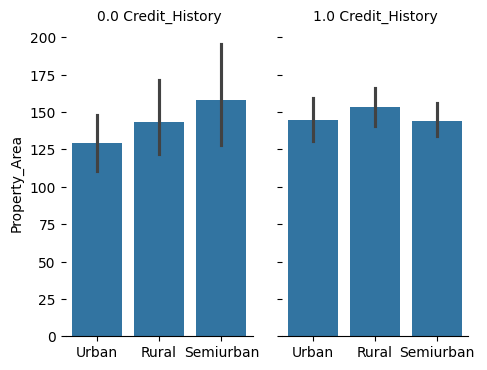

In [201]:
g=sns.catplot(
    df, kind="bar", #box"boxen"violin
    x="Property_Area", y="LoanAmount", col="Credit_History",
    height=4, aspect=.6,
)
g.set_axis_labels("", "Property_Area")
g.set_xticklabels(df['Property_Area'].unique())
g.set_titles("{col_name} {col_var}")
g.despine(left=True)

<Axes: xlabel='Property_Area', ylabel='LoanAmount'>

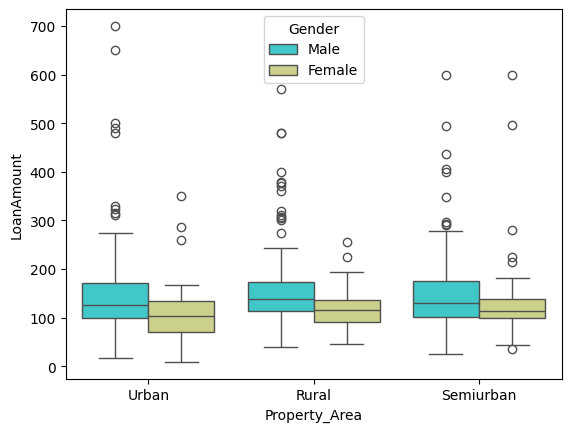

In [218]:
#sns.barplot(x='Property_Area',y='LoanAmount',data=df,hue='Gender',palette='rainbow')
#sns.countplot(x='Property_Area',data=df,hue='Gender',palette='rainbow')
sns.boxplot(x='Property_Area',y='LoanAmount',data=df,hue='Gender',palette='rainbow')#violinplot,stripplot,swarmplot

C:\Users\javier\AppData\Local\Temp\ipykernel_43976\3855891338.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Property_Area',y='LoanAmount', data=df,palette='rainbow')


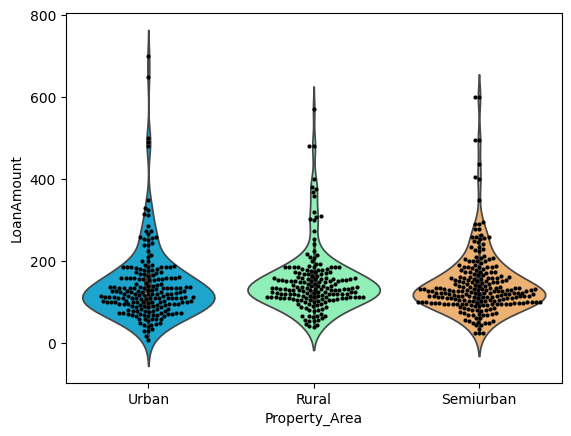

In [219]:
sns.violinplot(x='Property_Area',y='LoanAmount', data=df,palette='rainbow')
sns.swarmplot(x='Property_Area',y='LoanAmount', data=df,color='black',size=3);


In [228]:
sub_df= df[['ApplicantIncome','LoanAmount','CoapplicantIncome']]

In [229]:
sub_df.head()

,ApplicantIncome,LoanAmount,CoapplicantIncome
0,5849,128.0,0.0
1,4583,128.0,1508.0
2,3000,66.0,0.0
3,2583,120.0,2358.0
4,6000,141.0,0.0


In [230]:
sub_df.corr()

,ApplicantIncome,LoanAmount,CoapplicantIncome
ApplicantIncome,1.000000,0.555732,-0.116605
LoanAmount,0.555732,1.000000,0.190020
CoapplicantIncome,-0.116605,0.190020,1.000000


<Axes: >

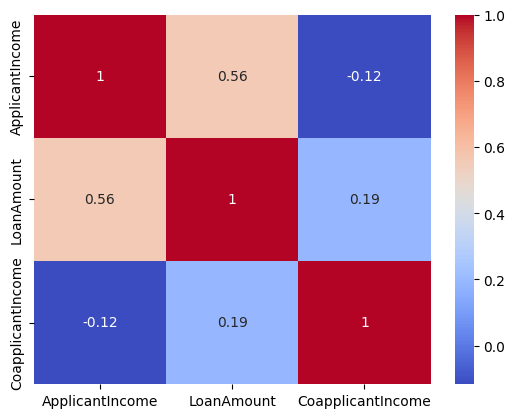

In [232]:
sns.heatmap(sub_df.corr(),cmap='coolwarm',annot=True)

In [253]:
pivote_df=df.pivot_table(values='LoanAmount',index='Property_Area',columns='Dependents')
pivote_df

Dependents,0,1,2,3+
Property_Area,,,,
Rural,142.663636,141.476190,171.100000,186.500000
Semiurban,135.007407,163.634146,140.594595,196.650000
Urban,131.651376,158.428571,142.157895,174.615385


<Axes: xlabel='Dependents', ylabel='Property_Area'>

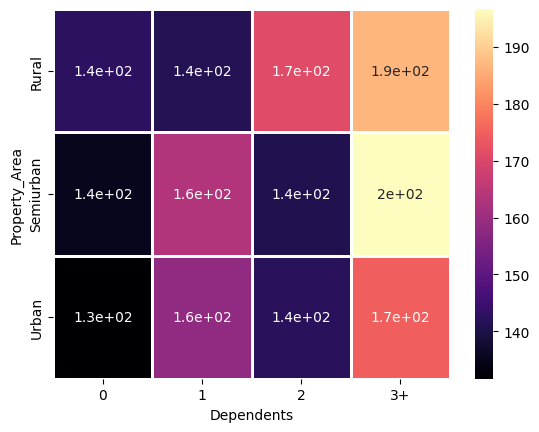

In [254]:
#sns.heatmap(pivote_df,cmap='coolwarm',annot=True)
sns.heatmap(pivote_df,cmap='magma',linecolor='white',linewidths=1,annot=True)

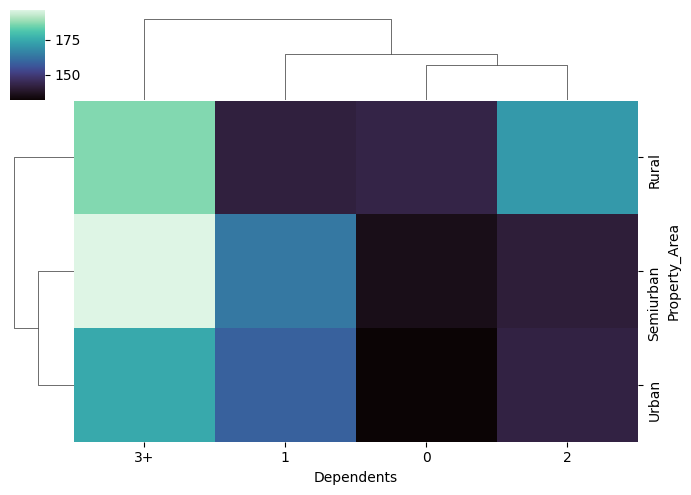

In [255]:
sns.clustermap(pivote_df,figsize=(7, 5),
    dendrogram_ratio=(.1, .2), cmap="mako")

In [269]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [270]:
def extract_year(x):
    y= x['date']
    year=y.year
    return year
df['year']= df.apply(lambda x : extract_year(x),axis=1)

<img src=https://datacomy.com/data_analysis/pandas/merge/types-of-joins.png>

In [285]:
data1 = {'key': ['K0', 'K1','K2' ,'K4', 'K5'],
         'key1': ['K0', 'K1', 'K0','K0', 'K1'],
         'Name':['John', 'Prince','James', 'Peter', 'Jack'], 
        'Age':[27, 24, 22, 32,20],} 
   
# Define a dictionary containing employee data 
data2 = {'key': ['K0', 'K1', 'K2', 'K3'],
         'key1': ['K0', 'K0', 'K0', 'K0'],
         'Address':['Max', 'Andrew', 'George', 'Will'], 
        'Qualification':['Btech', 'B.A', 'Bcom', 'B.hons']} 
 
# Convert the dictionary into DataFrame  
df = pd.DataFrame(data1)
 
# Convert the dictionary into DataFrame  
df1 = pd.DataFrame(data2) 
  

In [296]:
df

,key,key1,Name,Age
0,K0,K0,John,27
1,K1,K1,Prince,24
2,K2,K0,James,22
3,K4,K0,Peter,32
4,K5,K1,Jack,20


In [297]:
df1

,key,key1,Address,Qualification
0,K0,K0,Max,Btech
1,K1,K0,Andrew,B.A
2,K2,K0,George,Bcom
3,K3,K0,Will,B.hons


In [310]:
pd.concat([df,df1], axis=0)#.reset_index()

,key,key1,Name,Age,Address,Qualification
0,K0,K0,John,27.0,NaN,NaN
1,K1,K1,Prince,24.0,NaN,NaN
2,K2,K0,James,22.0,NaN,NaN
3,K4,K0,Peter,32.0,NaN,NaN
4,K5,K1,Jack,20.0,NaN,NaN
0,K0,K0,NaN,NaN,Max,Btech
1,K1,K0,NaN,NaN,Andrew,B.A
2,K2,K0,NaN,NaN,George,Bcom
3,K3,K0,NaN,NaN,Will,B.hons


In [313]:
pd.concat([df,df1], axis=1)

,key,key1,Name,Age,key,key1,Address,Qualification
0,K0,K0,John,27,K0,K0,Max,Btech
1,K1,K1,Prince,24,K1,K0,Andrew,B.A
2,K2,K0,James,22,K2,K0,George,Bcom
3,K4,K0,Peter,32,K3,K0,Will,B.hons
4,K5,K1,Jack,20,NaN,NaN,NaN,NaN


In [317]:
pd.concat([df,df1], axis=1,join='inner')

,key,key1,Name,Age,key,key1,Address,Qualification
0,K0,K0,John,27,K0,K0,Max,Btech
1,K1,K1,Prince,24,K1,K0,Andrew,B.A
2,K2,K0,James,22,K2,K0,George,Bcom
3,K4,K0,Peter,32,K3,K0,Will,B.hons


In [318]:
 pd.merge(df, df1, on='key')

,key,key1_x,Name,Age,key1_y,Address,Qualification
0,K0,K0,John,27,K0,Max,Btech
1,K1,K1,Prince,24,K0,Andrew,B.A
2,K2,K0,James,22,K0,George,Bcom


In [319]:
 pd.merge(df, df1, on=['key', 'key1'])

,key,key1,Name,Age,Address,Qualification
0,K0,K0,John,27,Max,Btech
1,K2,K0,James,22,George,Bcom


In [320]:
 pd.merge(df, df1, how='left', on='key')

,key,key1_x,Name,Age,key1_y,Address,Qualification
0,K0,K0,John,27,K0,Max,Btech
1,K1,K1,Prince,24,K0,Andrew,B.A
2,K2,K0,James,22,K0,George,Bcom
3,K4,K0,Peter,32,NaN,NaN,NaN
4,K5,K1,Jack,20,NaN,NaN,NaN


In [321]:
 pd.merge(df, df1, how='left', on=['key', 'key1'])

,key,key1,Name,Age,Address,Qualification
0,K0,K0,John,27,Max,Btech
1,K1,K1,Prince,24,NaN,NaN
2,K2,K0,James,22,George,Bcom
3,K4,K0,Peter,32,NaN,NaN
4,K5,K1,Jack,20,NaN,NaN


In [322]:
 pd.merge(df, df1, how='right', on='key')

,key,key1_x,Name,Age,key1_y,Address,Qualification
0,K0,K0,John,27.0,K0,Max,Btech
1,K1,K1,Prince,24.0,K0,Andrew,B.A
2,K2,K0,James,22.0,K0,George,Bcom
3,K3,NaN,NaN,NaN,K0,Will,B.hons


In [323]:
 pd.merge(df, df1, how='right', on=['key', 'key1'])

,key,key1,Name,Age,Address,Qualification
0,K0,K0,John,27.0,Max,Btech
1,K1,K0,NaN,NaN,Andrew,B.A
2,K2,K0,James,22.0,George,Bcom
3,K3,K0,NaN,NaN,Will,B.hons


In [324]:
pd.merge(df, df1, how='outer', on='key')

,key,key1_x,Name,Age,key1_y,Address,Qualification
0,K0,K0,John,27.0,K0,Max,Btech
1,K1,K1,Prince,24.0,K0,Andrew,B.A
2,K2,K0,James,22.0,K0,George,Bcom
3,K3,NaN,NaN,NaN,K0,Will,B.hons
4,K4,K0,Peter,32.0,NaN,NaN,NaN
5,K5,K1,Jack,20.0,NaN,NaN,NaN


In [325]:
pd.merge(df, df1, how='outer', on=['key', 'key1'])

,key,key1,Name,Age,Address,Qualification
0,K0,K0,John,27.0,Max,Btech
1,K1,K0,NaN,NaN,Andrew,B.A
2,K1,K1,Prince,24.0,NaN,NaN
3,K2,K0,James,22.0,George,Bcom
4,K3,K0,NaN,NaN,Will,B.hons
5,K4,K0,Peter,32.0,NaN,NaN
6,K5,K1,Jack,20.0,NaN,NaN


In [326]:
 pd.merge(df, df1, how='inner', on='key')

,key,key1_x,Name,Age,key1_y,Address,Qualification
0,K0,K0,John,27,K0,Max,Btech
1,K1,K1,Prince,24,K0,Andrew,B.A
2,K2,K0,James,22,K0,George,Bcom


In [327]:
 pd.merge(df, df1, how='inner', on=['key', 'key1'])

,key,key1,Name,Age,Address,Qualification
0,K0,K0,John,27,Max,Btech
1,K2,K0,James,22,George,Bcom
